In [1]:
import pandas as pd
import math
import io

In [25]:
df = pd.read_csv(
    'data/data.csv',
    header=None,
    names=[
      'month',
      'day',
      'total',
      'native'
    ]
    ).reset_index().rename(columns={'index': 'year'})

# Adjust the 'month' column to be 1-indexed instead of 0-indexed
df['month'] = df['month'] + 1

# Create a new 'date' column using the 'index', 'month', and 'day' columns
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Drop the original 'index', 'month', and 'day' columns
df = df.drop(['year', 'month', 'day'], axis=1)

# Optionally, set the 'date' column as the index
df.set_index('date', inplace=True)

# Get each month's median reading
df = df.resample('M').median()

df

,total,native
date,,
2008-09-30,0.143716,0.048836
2008-10-31,0.145862,0.053911
2008-11-30,0.148988,0.060445
2008-12-31,0.183200,0.067515
2009-01-31,0.181688,0.063300
...,...,...
2022-12-31,39.786829,39.786829
2023-01-31,39.409407,39.409407
2023-02-28,38.630472,38.630472


In [26]:
assert(all(df['total'] >= df['native']))

<AxesSubplot:xlabel='date', ylabel='Fragmentation (0-1)'>

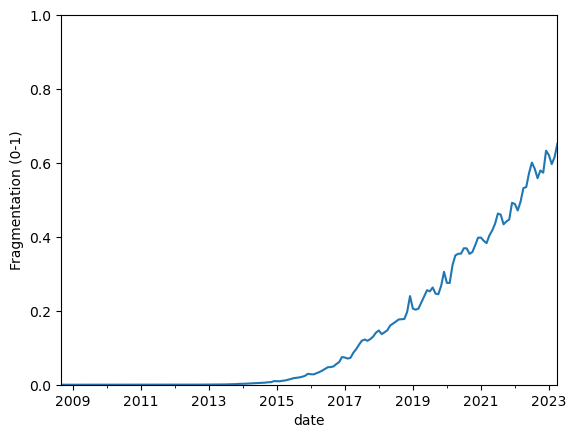

In [28]:
def fragmentation(score):
  '''
  Fragmentation is at its lowest when everyone uses either one protocol or the other.

  As IPv6 adoption ramps up, fragmentation will increase. After 50% of people use it, if adoption continues, fragmentation will begin to decrease agin.
  '''
  if score <= 50:
    return (score / 50)**2
  return 1 - ((score - 50) / 50)**2

assert(abs(fragmentation(0) - 0) < 1e-9)
assert(abs(fragmentation(100) - 0) < 1e-9)
assert(abs(fragmentation(50) - 1) < 1e-9)

df['fragmentation'] = df['total'].apply(fragmentation)

df['fragmentation'].plot(ylabel="Fragmentation (0-1)", ylim=(0,1))